In [0]:
!pip install keras==2.2.5

     |████████████████████████████████| 337kB 8.7MB/s 
  Found existing installation: Keras 2.3.1
    Uninstalling Keras-2.3.1:
      Successfully uninstalled Keras-2.3.1


In [0]:
!pip install tensorflow==1.14

     |████████████████████████████████| 109.2MB 97kB/s 
     |████████████████████████████████| 3.2MB 44.6MB/s 
     |████████████████████████████████| 491kB 45.6MB/s 
  Found existing installation: tensorboard 2.2.2
    Uninstalling tensorboard-2.2.2:
      Successfully uninstalled tensorboard-2.2.2
  Found existing installation: tensorflow-estimator 2.2.0
    Uninstalling tensorflow-estimator-2.2.0:
      Successfully uninstalled tensorflow-estimator-2.2.0
  Found existing installation: tensorflow 2.2.0
    Uninstalling tensorflow-2.2.0:
      Successfully uninstalled tensorflow-2.2.0


In [0]:
!git clone https://github.com/MathiasGruber/PConv-Keras.git

Cloning into 'PConv-Keras'...
remote: Enumerating objects: 3, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing objects: 100% (3/3), done.
remote: Total 396 (delta 0), reused 0 (delta 0), pack-reused 393
Receiving objects: 100% (396/396), 62.27 MiB | 25.29 MiB/s, done.
Resolving deltas: 100% (201/201), done.


In [0]:
import os
os.chdir('/content/PConv-Keras')

In [0]:
import os
import itertools
import matplotlib
import matplotlib.pyplot as plt

# Change to root path
if os.path.basename(os.getcwd()) != 'PConv-Keras':
    os.chdir('..')
    
# Import function that generates random masks
from libs.util import MaskGenerator

%matplotlib inline

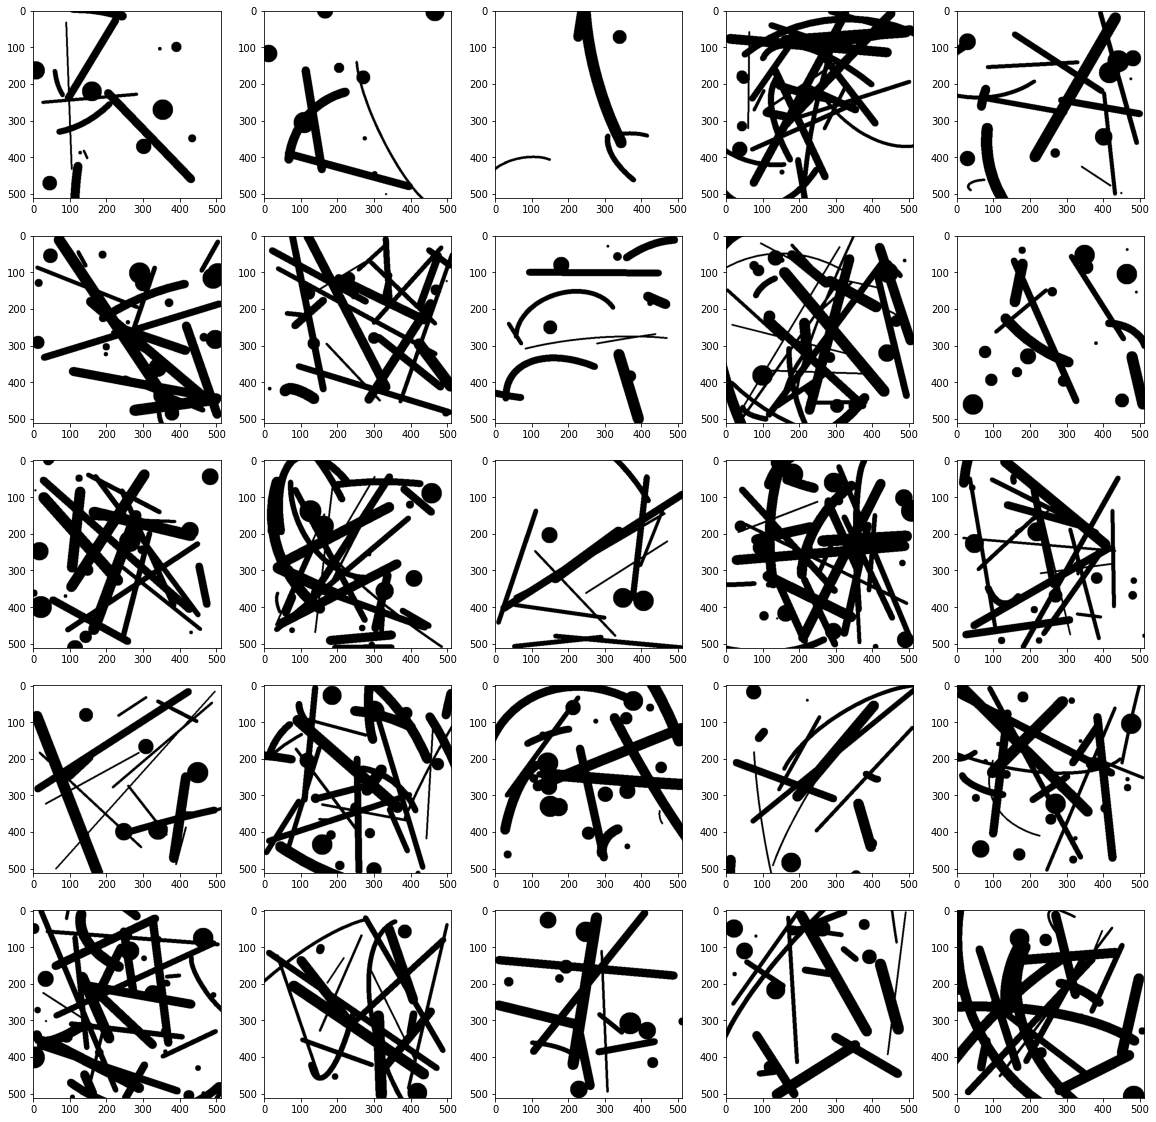

In [0]:
# Instantiate mask generator
mask_generator = MaskGenerator(512, 512, 3, rand_seed=42)

# Plot the results
_, axes = plt.subplots(5, 5, figsize=(20, 20))
axes = list(itertools.chain.from_iterable(axes))

for i in range(len(axes)):
    
    # Generate image
    img = mask_generator.sample()
    
    # Plot image on axis
    axes[i].imshow(img*255)

In [0]:
!mkdir data
!mkdir data/masks
!mkdir data/masks/train

mkdir: cannot create directory ‘data’: File exists


In [0]:
!wget https://www.dropbox.com/s/qp8cxqttta4zi70/irregular_mask.zip

--2020-06-03 20:01:21--  https://www.dropbox.com/s/qp8cxqttta4zi70/irregular_mask.zip
Resolving www.dropbox.com (www.dropbox.com)... 162.125.65.1, 2620:100:601b:1::a27d:801
Connecting to www.dropbox.com (www.dropbox.com)|162.125.65.1|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/qp8cxqttta4zi70/irregular_mask.zip [following]
--2020-06-03 20:01:21--  https://www.dropbox.com/s/raw/qp8cxqttta4zi70/irregular_mask.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uce2e2b9bce1ed4287df492a54fb.dl.dropboxusercontent.com/cd/0/inline/A4_vw-7xTGXbHKOQycsnZfwe_Yzpv0AgenEpnfs3GMV1iTGwo1oODmpthZEz42i-tlC0OL-qPw3Z_SPt-VY8wIi7vacMEyIVNOTs58zxTheXvQ/file# [following]
--2020-06-03 20:01:21--  https://uce2e2b9bce1ed4287df492a54fb.dl.dropboxusercontent.com/cd/0/inline/A4_vw-7xTGXbHKOQycsnZfwe_Yzpv0AgenEpnfs3GMV1iTGwo1oODmpthZEz42i-tlC0OL-qPw3Z_SPt-VY8wIi7vacMEyIVNOTs58zxTheXvQ/file

In [0]:
!unzip irregular_mask.zip -d data/masks/train/

Streaming output truncated to the last 5000 lines.
  inflating: data/masks/train/irregular_mask/disocclusion_img_mask/50119.png  
  inflating: data/masks/train/irregular_mask/disocclusion_img_mask/50120.png  
  inflating: data/masks/train/irregular_mask/disocclusion_img_mask/50121.png  
  inflating: data/masks/train/irregular_mask/disocclusion_img_mask/50122.png  
  inflating: data/masks/train/irregular_mask/disocclusion_img_mask/50123.png  
  inflating: data/masks/train/irregular_mask/disocclusion_img_mask/50124.png  
  inflating: data/masks/train/irregular_mask/disocclusion_img_mask/50125.png  
  inflating: data/masks/train/irregular_mask/disocclusion_img_mask/50126.png  
  inflating: data/masks/train/irregular_mask/disocclusion_img_mask/50127.png  
  inflating: data/masks/train/irregular_mask/disocclusion_img_mask/50128.png  
  inflating: data/masks/train/irregular_mask/disocclusion_img_mask/50129.png  
  inflating: data/masks/train/irregular_mask/disocclusion_img_mask/50130.png  
 

>> Found 55116 masks in data/masks/train/irregular_mask/disocclusion_img_mask


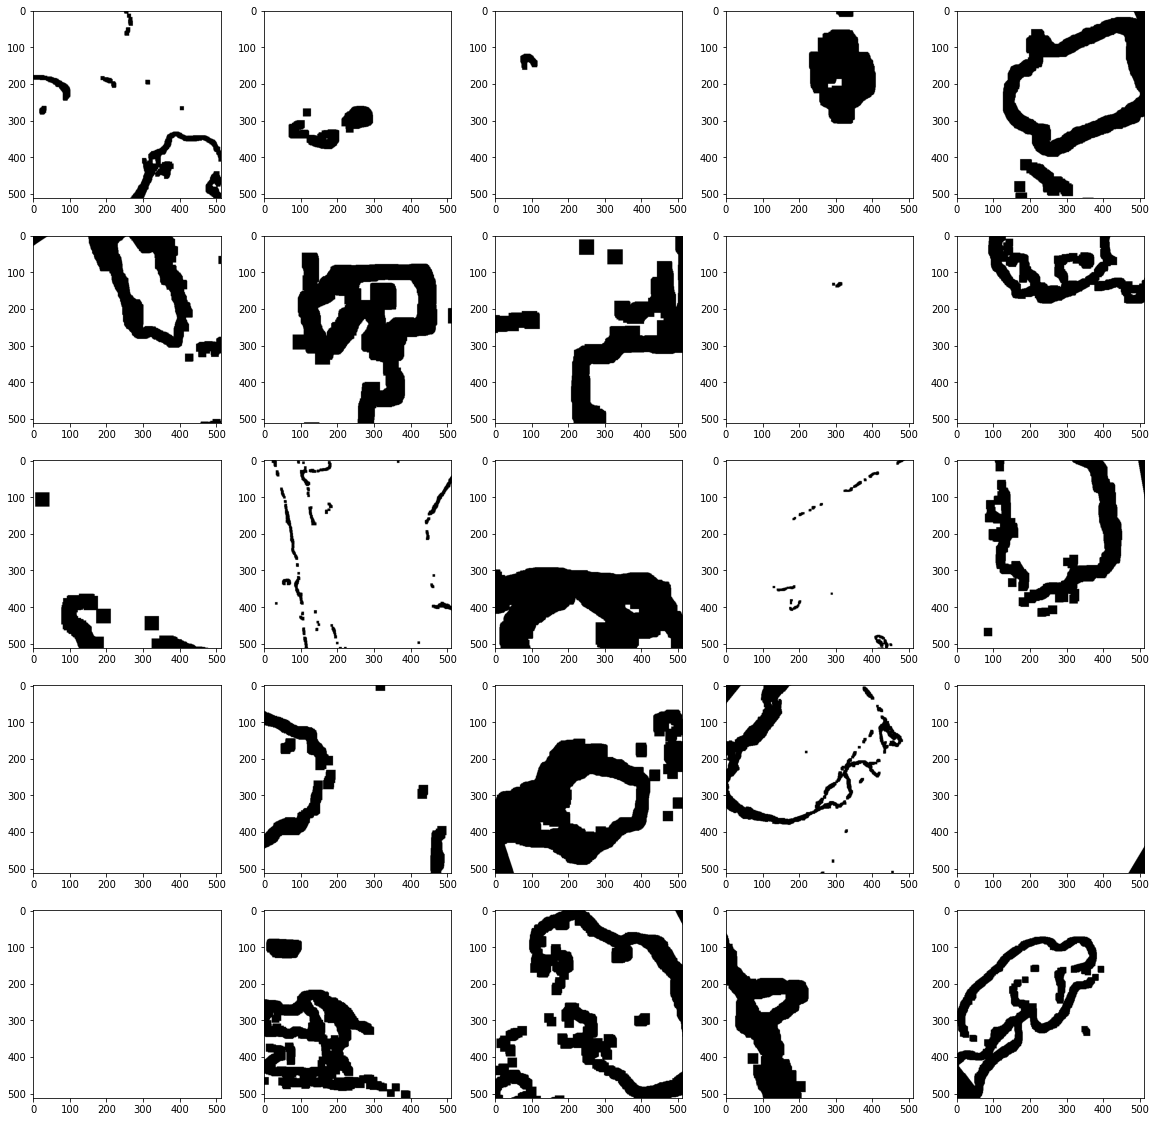

In [0]:
# Instantiate mask generator
mask_generator = MaskGenerator(512, 512, 3, rand_seed=42, filepath='data/masks/train/irregular_mask/disocclusion_img_mask')

# Plot the results
_, axes = plt.subplots(5, 5, figsize=(20, 20))
axes = list(itertools.chain.from_iterable(axes))

for i in range(len(axes)):
    
    # Generate image
    img = mask_generator.sample()
    
    # Plot image on axis
    axes[i].imshow(img*255)

In [0]:
import os
from copy import deepcopy
import cv2
import numpy as np

from keras.layers import Input, Dense, ZeroPadding2D
from keras.models import Model

# Import modules from libs/ directory
from libs.pconv_layer import PConv2D
from libs.util import MaskGenerator

%matplotlib inline
%load_ext autoreload
%autoreload 2

Using TensorFlow backend.
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:519: FutureWarn

Shape of image is: (639, 960, 3)


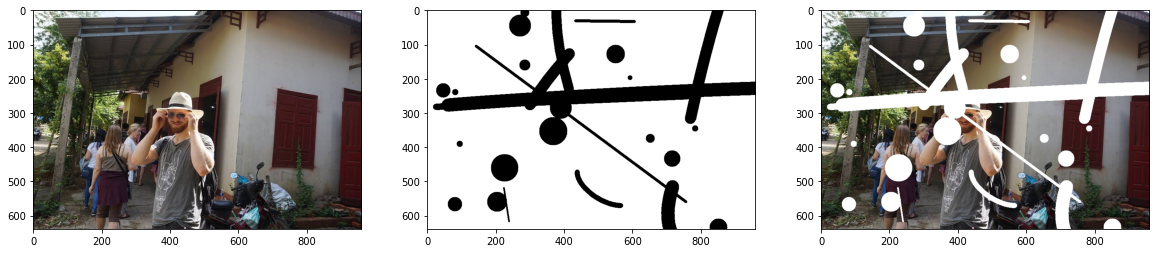

In [0]:
# Load image
img = cv2.imread('data/sample_image.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
shape = img.shape
print(f"Shape of image is: {shape}")

# Instantiate mask generator
mask_generator = MaskGenerator(shape[0], shape[1], 3, rand_seed=42)

# Load mask
mask = mask_generator.sample()

# Image + mask
masked_img = deepcopy(img)
masked_img[mask==0] = 255

# Show side by side
_, axes = plt.subplots(1, 3, figsize=(20, 5))
axes[0].imshow(img)
axes[1].imshow(mask*255)
axes[2].imshow(masked_img)
plt.show()

In [0]:
from libs.pconv_layer import PConv2D

# Input images and masks
input_img = Input(shape=(shape[0], shape[1], shape[2],))
input_mask = Input(shape=(shape[0], shape[1], shape[2],))
output_img, output_mask1 = PConv2D(8, kernel_size=(7,7), strides=(2,2))([input_img, input_mask])
output_img, output_mask2 = PConv2D(16, kernel_size=(5,5), strides=(2,2))([output_img, output_mask1])
output_img, output_mask3 = PConv2D(32, kernel_size=(5,5), strides=(2,2))([output_img, output_mask2])
output_img, output_mask4 = PConv2D(64, kernel_size=(3,3), strides=(2,2))([output_img, output_mask3])
output_img, output_mask5 = PConv2D(64, kernel_size=(3,3), strides=(2,2))([output_img, output_mask4])
output_img, output_mask6 = PConv2D(64, kernel_size=(3,3), strides=(2,2))([output_img, output_mask5])
output_img, output_mask7 = PConv2D(64, kernel_size=(3,3), strides=(2,2))([output_img, output_mask6])
output_img, output_mask8 = PConv2D(64, kernel_size=(3,3), strides=(2,2))([output_img, output_mask7])

# Create model
model = Model(
    inputs=[input_img, input_mask], 
    outputs=[
        output_img, output_mask1, output_mask2, 
        output_mask3, output_mask4, output_mask5,
        output_mask6, output_mask7, output_mask8
    ])
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

# Show summary of the model
model.summary()






Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 639, 960, 3)  0                                            
__________________________________________________________________________________________________
input_2 (InputLayer)            (None, 639, 960, 3)  0                                            
__________________________________________________________________________________________________
p_conv2d_1 (PConv2D)            [(None, 320, 480, 8) 1184        input_1[0][0]                    
                                                                 input_2[0][0]                    
__________________________________________________________________________________________________
p_conv2d_2 (PConv2D)            [(None, 160, 240, 16 3216        p_conv2d_1[0][0]      

In [0]:
formatted_img = np.expand_dims(masked_img, 0) / 255
formatted_mask = np.expand_dims(mask, 0)
print(f"Original Mask Shape: {formatted_mask.shape} - Max value in mask: {np.max(formatted_mask)}")

output_img, o1, o2, o3, o4, o5, o6, o7, o8 = model.predict([formatted_img, formatted_mask])

Original Mask Shape: (1, 639, 960, 3) - Max value in mask: 1



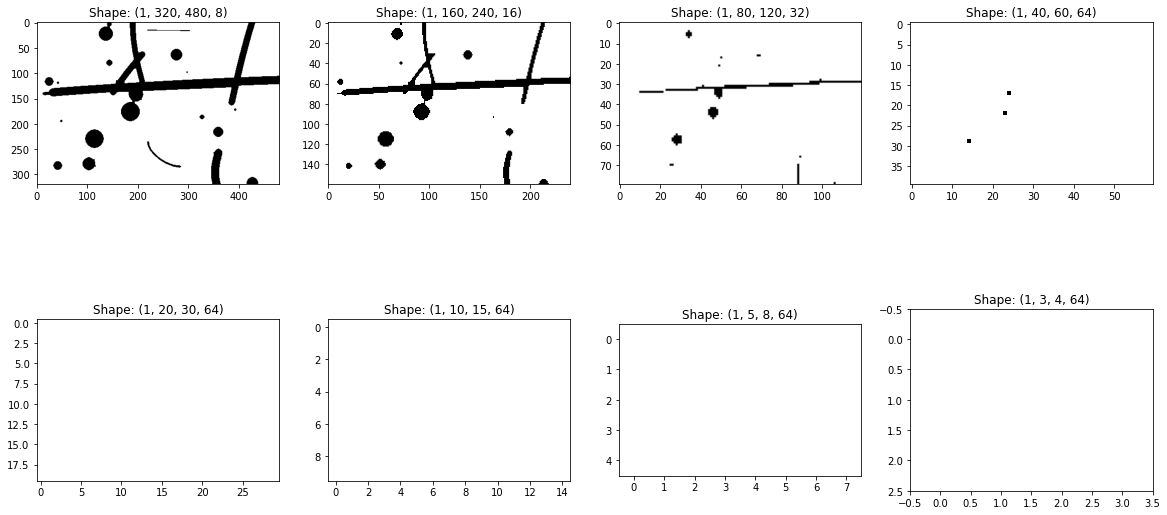

In [0]:
_, axes = plt.subplots(2, 4, figsize=(20, 10))
axes[0][0].imshow(o1[0, :,:, 0], cmap = 'gray', vmin=0, vmax=1)
axes[0][1].imshow(o2[0, :,:, 0], cmap = 'gray', vmin=0, vmax=1)
axes[0][2].imshow(o3[0, :,:, 0], cmap = 'gray', vmin=0, vmax=1)
axes[0][3].imshow(o4[0, :,:, 0], cmap = 'gray', vmin=0, vmax=1)
axes[1][0].imshow(o5[0, :,:, 0], cmap = 'gray', vmin=0, vmax=1)
axes[1][1].imshow(o6[0, :,:, 0], cmap = 'gray', vmin=0, vmax=1)
axes[1][2].imshow(o7[0, :,:, 0], cmap = 'gray', vmin=0, vmax=1)
axes[1][3].imshow(o8[0, :,:, 0], cmap = 'gray', vmin=0, vmax=1)
axes[0][0].set_title(f"Shape: {o1.shape}")
axes[0][1].set_title(f"Shape: {o2.shape}")
axes[0][2].set_title(f"Shape: {o3.shape}")
axes[0][3].set_title(f"Shape: {o4.shape}")
axes[1][0].set_title(f"Shape: {o5.shape}")
axes[1][1].set_title(f"Shape: {o6.shape}")
axes[1][2].set_title(f"Shape: {o7.shape}")
axes[1][3].set_title(f"Shape: {o8.shape}")
plt.show()

In [0]:
import os
import gc
import copy

import numpy as np
from PIL import Image

from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import TensorBoard, ModelCheckpoint, LambdaCallback

from libs.pconv_model import PConvUnet
# Settings
BATCH_SIZE = 4

# Imagenet Rescaling
MEAN = np.array([0.485, 0.456, 0.406])
STD = np.array([0.229, 0.224, 0.225])

In [0]:
PConvUnet().summary()




Model: "model_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
inputs_img (InputLayer)         (None, 512, 512, 3)  0                                            
__________________________________________________________________________________________________
inputs_mask (InputLayer)        (None, 512, 512, 3)  0                                            
__________________________________________________________________________________________________
p_conv2d_9 (PConv2D)            [(None, 256, 256, 64 9472        inputs_img[0][0]                 
                                                                 inputs_mask[0][0]                
__________________________________________________________________________________________________
activation_1 (Activation)       (None, 256, 256, 64) 0           p_conv2d_9[0][0]        

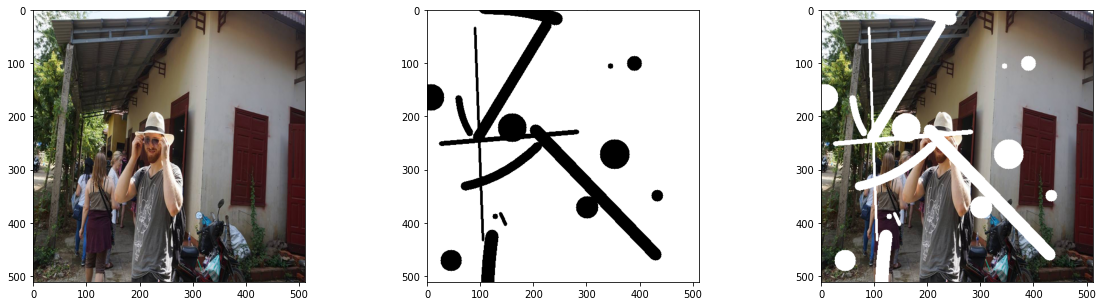

In [0]:
# Instantiate mask generator
mask_generator = MaskGenerator(512, 512, 3, rand_seed=42)

# Load image
img = np.array(Image.open('data/sample_image.jpg').resize((512, 512))) / 255

# Load mask
mask = mask_generator.sample()

# Image + mask
masked_img = copy.deepcopy(img)
masked_img[mask==0] = 1

# Show side by side
_, axes = plt.subplots(1, 3, figsize=(20, 5))
axes[0].imshow(img)
axes[1].imshow(mask*255)
axes[2].imshow(masked_img)
plt.show()

In [0]:
def plot_sample_data(masked, mask, ori, middle_title='Raw Mask'):
    _, axes = plt.subplots(1, 3, figsize=(20, 5))
    axes[0].imshow(masked[:,:,:])
    axes[0].set_title('Masked Input')
    axes[1].imshow(mask[:,:,:])
    axes[1].set_title(middle_title)
    axes[2].imshow(ori[:,:,:])
    axes[2].set_title('Target Output')
    plt.show()

class DataGenerator(ImageDataGenerator):
    def flow(self, x, *args, **kwargs):
        while True:
            
            # Get augmentend image samples
            ori = next(super().flow(x, *args, **kwargs))

            # Get masks for each image sample
            mask = np.stack([mask_generator.sample() for _ in range(ori.shape[0])], axis=0)

            # Apply masks to all image sample
            masked = copy.deepcopy(ori)
            masked[mask==0] = 1

            # Yield ([ori, masl],  ori) training batches
            # print(masked.shape, ori.shape)
            gc.collect()
            yield [masked, mask], ori        

# Create datagen
datagen = DataGenerator(  
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True
)

# Create generator from numpy array
batch = np.stack([img for _ in range(BATCH_SIZE)], axis=0)
generator = datagen.flow(x=batch, batch_size=BATCH_SIZE)

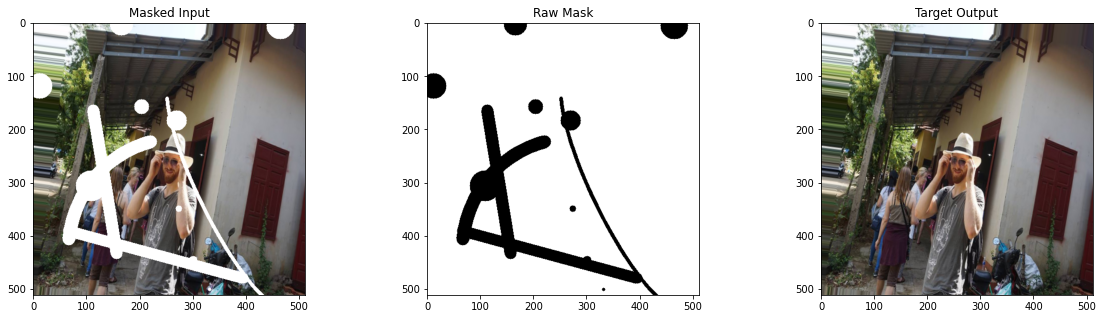

In [0]:
[m1, m2], o1 = next(generator)
plot_sample_data(m1[0], m2[0]*255, o1[0])

In [0]:
!gdown https://drive.google.com/uc?id=1HOzmKQFljTdKWftEP-kWD7p2paEaeHM0

Downloading...
From: https://drive.google.com/uc?id=1HOzmKQFljTdKWftEP-kWD7p2paEaeHM0
To: /content/PConv-Keras/pytorch_to_keras_vgg16.h5
553MB [00:03, 140MB/s]


In [0]:
!cp pytorch_to_keras_vgg16.h5 data/logs/

In [0]:
# Instantiate model
model = PConvUnet(vgg_weights='data/logs/pytorch_to_keras_vgg16.h5')

In [0]:
import tensorflow as tf
from tensorflow import keras

In [0]:
model.fit_generator(
    generator, 
    steps_per_epoch=2000,
    epochs=10,
    callbacks=[
        TensorBoard(
            log_dir='data/logs/single_image_test',
            write_graph=False
        ),
        ModelCheckpoint(
            'data/logs/single_image_test/weights.{epoch:02d}-{loss:.2f}.h5',
            monitor='loss', 
            save_best_only=True, 
            save_weights_only=True
        ),
        LambdaCallback(
            on_epoch_end=lambda epoch, logs: plot_sample_data(
                masked_img, 
                model.predict(
                    [
                        np.expand_dims(masked_img,0), 
                        np.expand_dims(mask,0)
                    ]
                )[0]
                , 
                img,
                middle_title='Prediction'
            )
        )
    ],
)



Epoch 1/10
  11/2000 [..............................] - ETA: 31:22:31 - loss: 8.6851 - PSNR: 11.0820

In [0]:
import numpy as np
import cv2 as cv
img = cv.imread('img.jpg')
mask = cv.imread('mask.png',0)
dst_1 = cv.inpaint(img,mask,3,cv.INPAINT_TELEA)
dst_2 = cv.inpaint(img,mask,3,cv.INPAINT_NS)

True

In [0]:
!gdown https://vk.com/away.php?to=https%3A%2F%2Fdrive.google.com%2Ffile%2Fd%2F1OdbuNJj4gV9KUoknQG063jJrJ1srhBvU%2Fview

Downloading...
From: https://vk.com/away.php?to=https%3A%2F%2Fdrive.google.com%2Ffile%2Fd%2F1OdbuNJj4gV9KUoknQG063jJrJ1srhBvU%2Fview
To: /content/away.php?to=https%3A%2F%2Fdrive.google.com%2Ffile%2Fd%2F1OdbuNJj4gV9KUoknQG063jJrJ1srhBvU%2Fview
557B [00:00, 1.30MB/s]       


In [0]:
from libs.pconv_model import PConvUnet
model = PConvUnet(vgg_weights=None, inference_only=True)
model.load(r"pconv_imagenet.27-1.05.h5", train_bn=False)

In [0]:
from copy import deepcopy
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

from libs.pconv_model import PConvUnet
from libs.util import ImageChunker

In [0]:
import cv2
img = cv2.imread('/content/7yWY9Oeh1PE.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
mask = cv2.imread('/content/oB53Nx9YAUU.jpg')

In [0]:
from libs.pconv_model import PConvUnet


chunker = ImageChunker(512, 512, 30)

def plot_images(images, s=5):
_, axes = plt.subplots(1, len(images), figsize=(s*len(images), s))
if len(images) == 1:
axes = [axes]
for img, ax in zip(images, axes):
ax.imshow(img)
plt.show()


chunked_images = chunker.dimension_preprocess(deepcopy(img))
chunked_masks = chunker.dimension_preprocess(deepcopy(mask))
pred_imgs = model.predict([chunked_images, chunked_masks])
reconstructed_image = chunker.dimension_postprocess(pred_imgs, img)

# Plot results
plot_images(chunked_images)
plot_images(pred_imgs)